# Reading the Data and Preprocessing

In [310]:
#import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
import seaborn as sns
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from tqdm import tqdm

# Read the dataset

In [311]:
df= pd.read_csv('predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# Data Analysis

In [312]:
df.shape

(10000, 10)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
print(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [ ]:
print(df.describe(include= 'object'))

,Product ID,Type,Failure Type
count,10000,10000,10000
unique,10000,3,6
top,M14860,L,No Failure
freq,1,6000,9652


In [316]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [317]:
df.duplicated().sum()

0

## Droping unnecessary columns 

In [ ]:
df.drop(columns=['UDI','Product ID'],inplace=True)
print(df.head())

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [319]:
cat_cols= df.select_dtypes(include= 'O').columns.tolist()
cat_cols

['Type', 'Failure Type']

In [320]:
for col in cat_cols:
    print(df[col].value_counts())

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


## Encoding

In [325]:
df['Type'].replace({'M':0,"L":1,"H":2},inplace=True)

In [326]:
y=df[['Target']]
x=df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
y['Target'].unique()

array([0, 1], dtype=int64)

In [327]:
print(df['Type'].unique())

[0 1 2]


In [328]:
print(np.shape(y))

(10000, 1)


In [329]:
len(x.columns)

5

# Data Visualization

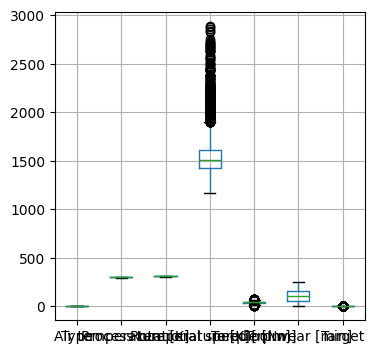

In [330]:
plt.figure(figsize=(4,4))
df.boxplot(figsize= (15,10))
plt.show()

C:\Users\mhmou\AppData\Local\Temp\ipykernel_27432\3642882504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rotational speed [rpm]'])


<Axes: xlabel='Rotational speed [rpm]', ylabel='Density'>

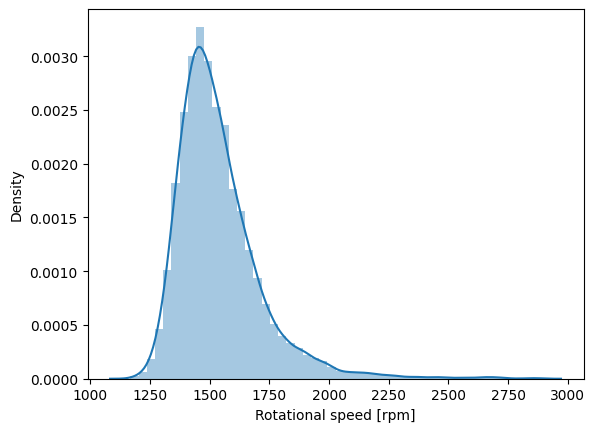

In [331]:
sns.distplot(df['Rotational speed [rpm]'])

In [332]:
from scipy.stats import skew

skewness = skew(df['Rotational speed [rpm]'])
print('Skewness: ', skewness)

Skewness:  1.9928720166048546


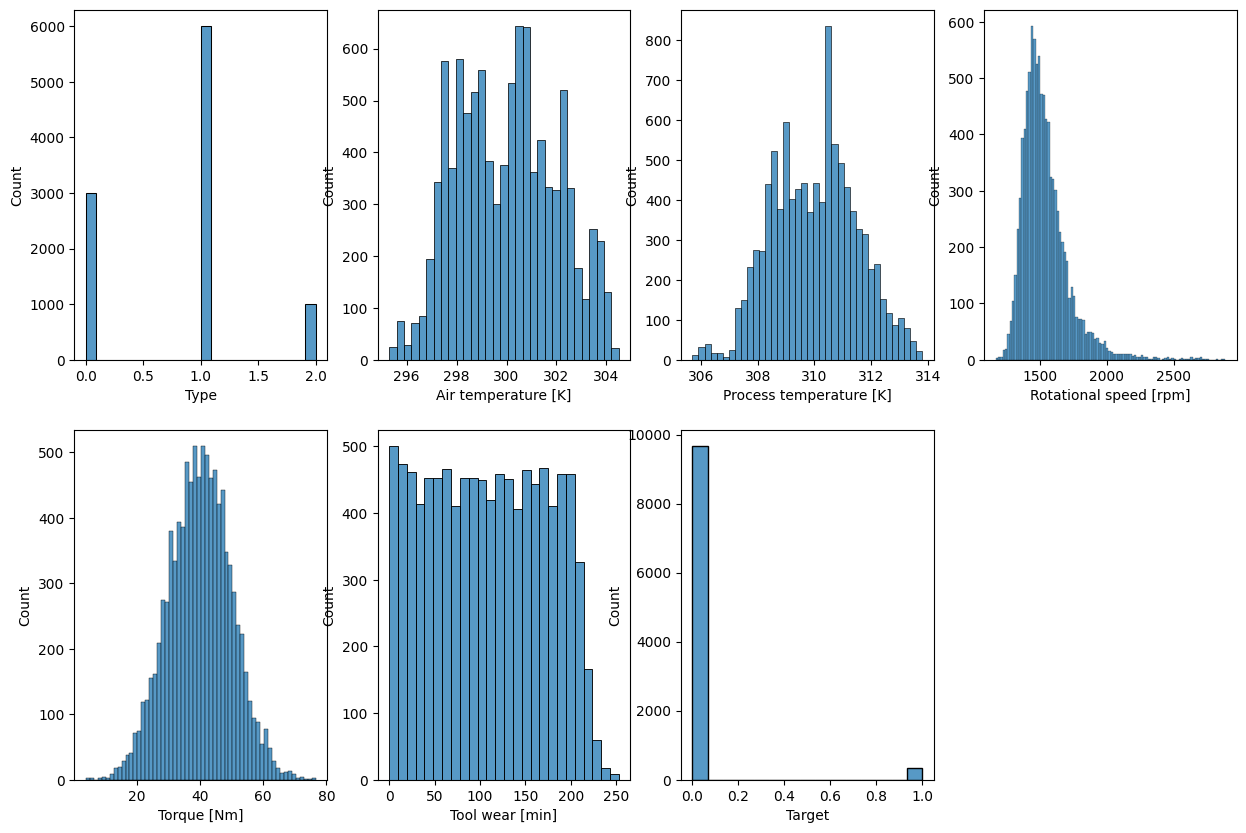

In [333]:
num_cols= df.select_dtypes(exclude='O').columns.tolist()

plt.figure(figsize= (15,10))

for i, col in  enumerate(num_cols, 1):
    plt.subplot(2,4,i)
    sns.histplot(data= df, x= col)
plt.show()

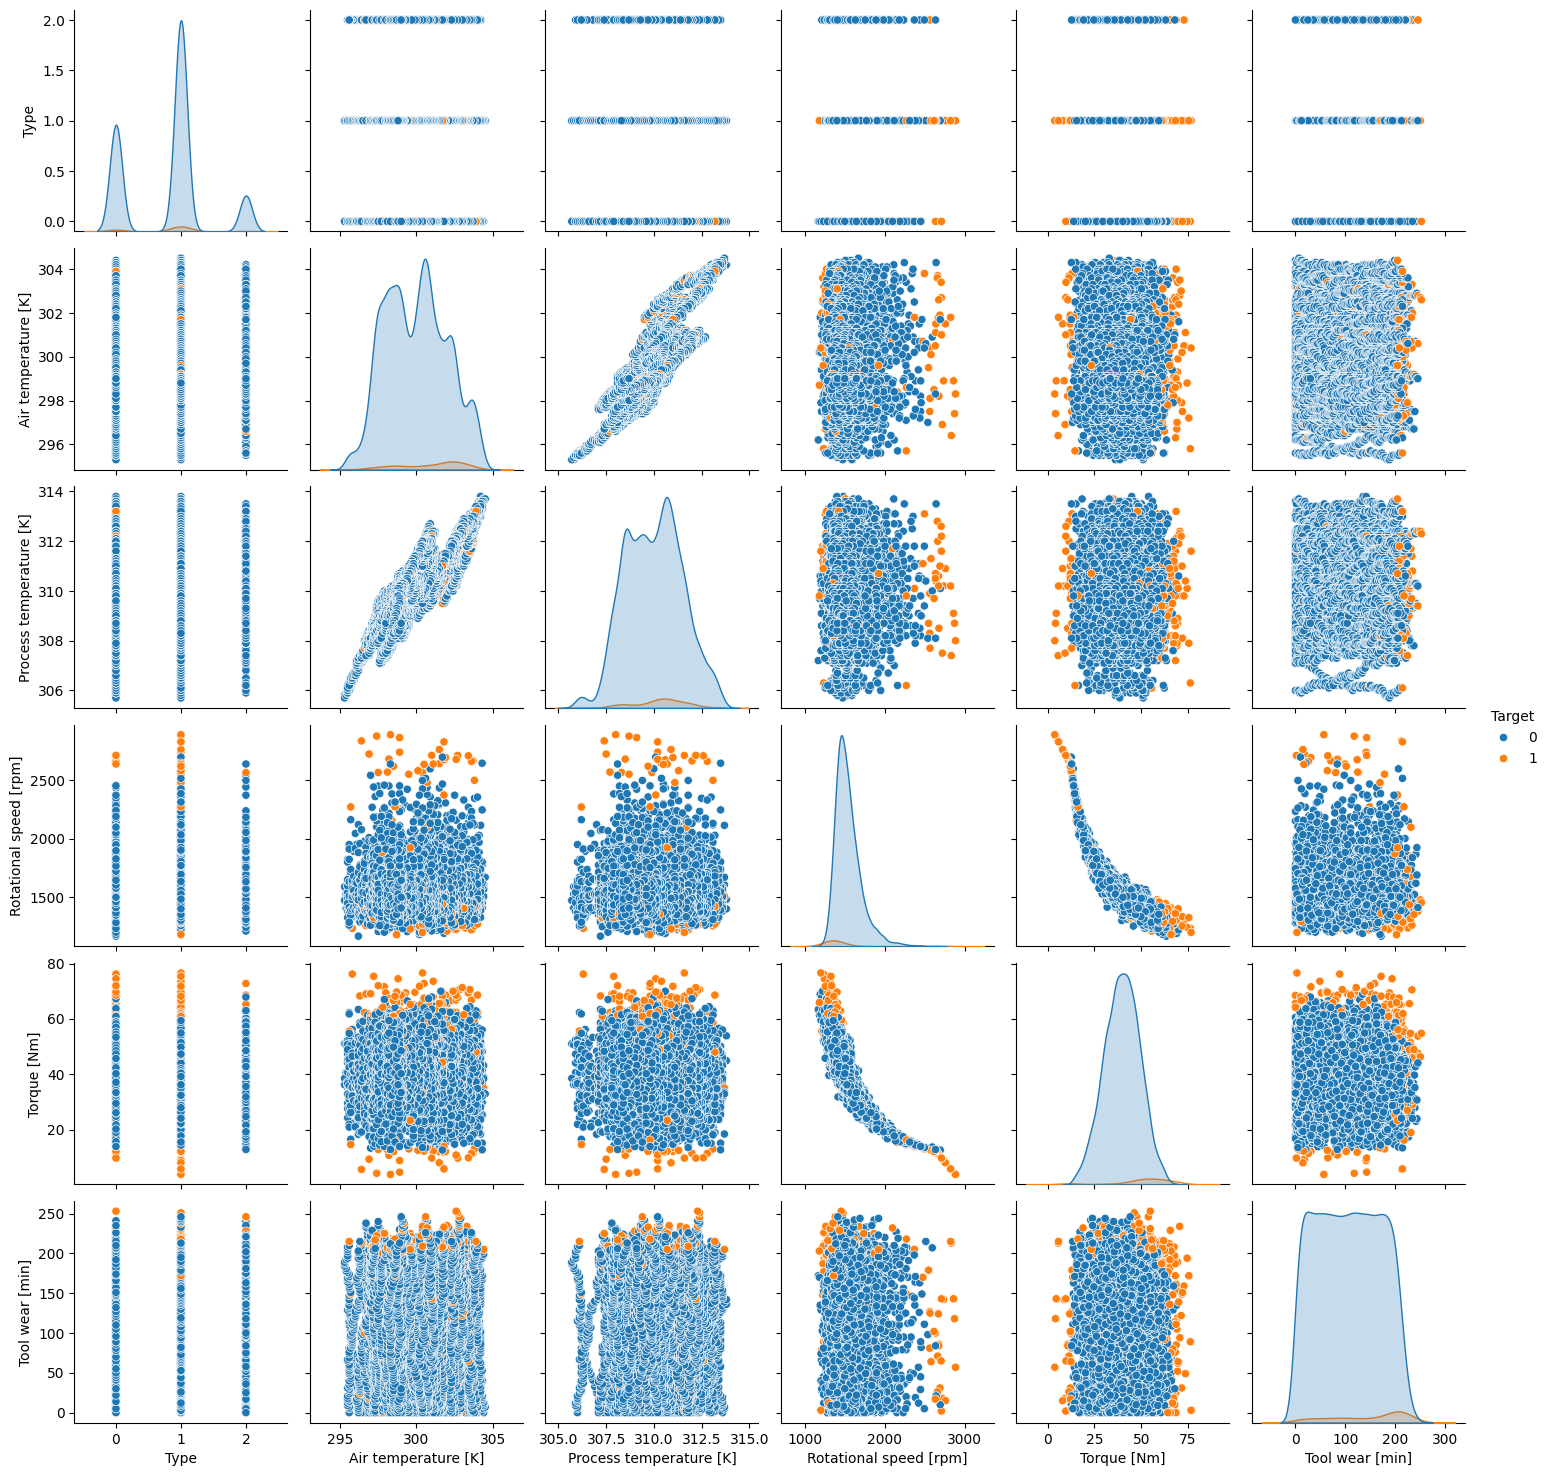

In [334]:
sns.pairplot(df, hue= 'Target')
plt.show()

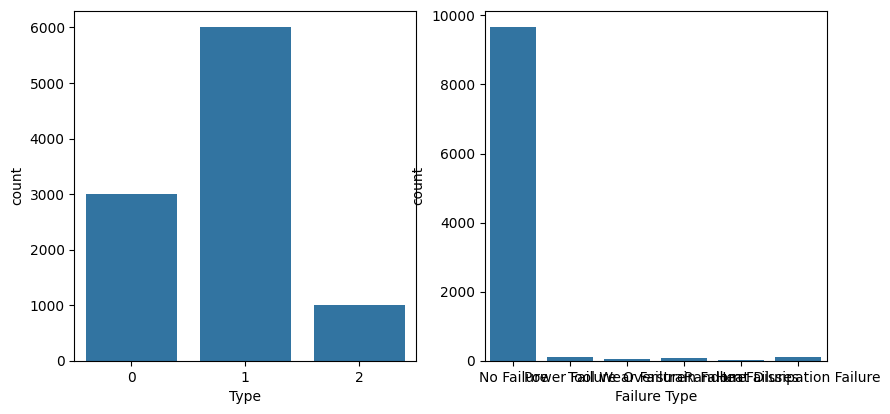

In [335]:
plt.figure(figsize= (15,10))

for i, col in  enumerate(cat_cols, 1):
    plt.subplot(2,3,i)
    sns.countplot(data= df, x= col)
plt.show()

<Axes: >

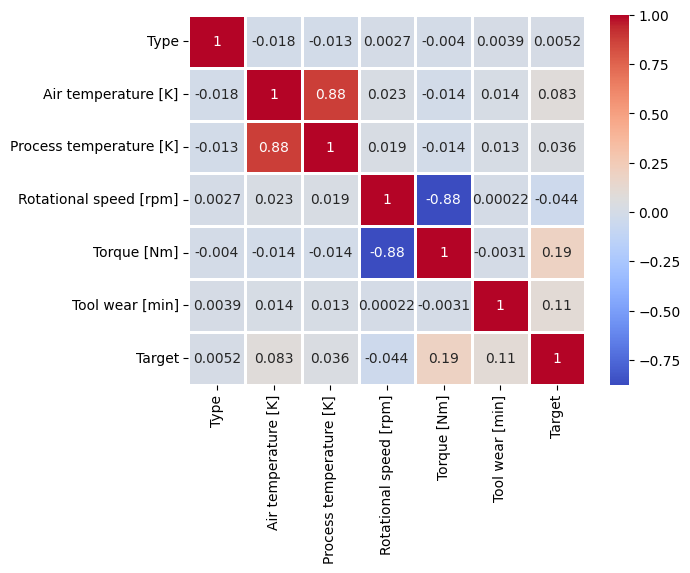

In [336]:
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= 'coolwarm', linewidths=2)

# Mode-Specific Normalization

In [ ]:
n_class=len(np.unique(y))
n_features=len(x.columns)
batch_size = 10
epoch_count = 10
noise_dim = 100
len(df['Failure Type'].unique())

In [337]:
# Function to fit GMM for a single continuous feature
def fit_gmm_for_continuous_feature(feature, n_components=2):
    gmm = GaussianMixture(n_components=n_components)
    feature = feature.to_numpy().reshape(-1, 1)
    gmm.fit(feature)
    return gmm

# Function to normalize a continuous feature using GMM
def normalize_feature_with_gmm(feature, gmm):
    # Predict the cluster for each value in the feature
    cluster_ids = gmm.predict(feature.to_numpy().reshape(-1, 1))
    # Get the means and variances for the corresponding clusters
    means = gmm.means_[cluster_ids].flatten()
    variances = np.sqrt(gmm.covariances_[cluster_ids].flatten())
    # Normalize the feature based on its assigned cluster
    normalized_feature = (feature - means) / variances
    return normalized_feature, cluster_ids

# Function to inverse normalize the feature (after generation)
def inverse_normalize_with_gmm(normalized_feature, gmm, cluster_ids):
    means = gmm.means_[cluster_ids].flatten()
    variances = np.sqrt(gmm.covariances_[cluster_ids].flatten())
    original_feature = normalized_feature * variances + means
    return original_feature


#### Normalizing the Data in X

In [338]:
#normalizing the data
normalized_feature=np.zeros(shape=(n_features,len(y)))
n=0
gmm=[]
for i in x.columns:
    gmm_model=fit_gmm_for_continuous_feature(x[i])
    gmm.append(gmm_model)
    normalized_feature[n],cluster_ids=normalize_feature_with_gmm(x[i],gmm_model)
    n+=1
    print(cluster_ids.shape)
normalized_feature=normalized_feature.T
gmm

(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


[GaussianMixture(n_components=2),
 GaussianMixture(n_components=2),
 GaussianMixture(n_components=2),
 GaussianMixture(n_components=2),
 GaussianMixture(n_components=2)]

In [340]:
# Grouping the data together to make it ready to be batched
dataset = tf.data.Dataset.from_tensor_slices((normalized_feature, y))
dataset = dataset.shuffle(buffer_size=1000).batch(batch_size,drop_remainder=True)

print(len(dataset))

1000


In [342]:
print(len(y))

10000


# CTGAN Model

#### Loss and Optiimizer

In [343]:
# Define Loss function for Classification between Real and Fake
bce_loss = tf.keras.losses.BinaryCrossentropy()

# Discriminator Loss
def discriminator_loss(real, fake):
	real_loss = bce_loss(tf.ones_like(real), real)
	fake_loss = bce_loss(tf.zeros_like(fake), fake)
	total_loss = real_loss + fake_loss
	return total_loss

# Generator Loss
def generator_loss(preds):
	return bce_loss(tf.ones_like(preds), preds)

# Optimiser for both Generator and Dsicriminator
d_optimizer=Adam(learning_rate=0.0002, beta_1 = 0.5)
g_optimizer=Adam(learning_rate=0.0002, beta_1 = 0.5)


Building the Generator Model


In [344]:
def build_generator():

	# label input
	in_label = tf.keras.layers.Input(shape=(1,))
	li = tf.keras.layers.Embedding(n_class, 100)(in_label)
	li = tf.keras.layers.Flatten()(li)

	# data generator input
	in_lat = tf.keras.layers.Input(shape=(noise_dim,))
	gen = tf.keras.layers.Dense(512)(in_lat)
	gen = tf.keras.layers.LeakyReLU(alpha=0.1)(gen)

	# merge data gen and label input
	merge = tf.keras.layers.Concatenate()([gen, li])

	gen = tf.keras.layers.Dense(1024)(merge) 
	gen = tf.keras.layers.LeakyReLU(alpha=0.2)(gen)

	gen = tf.keras.layers.Dense(512)(gen) 
	gen = tf.keras.layers.LeakyReLU(alpha=0.2)(gen)

	gen = tf.keras.layers.Dense(128)(gen) 
	gen = tf.keras.layers.LeakyReLU(alpha=0.2)(gen)

	# Activation function 'linear' for continous data type for the tabular data
	out_layer = tf.keras.layers.Dense(n_features, activation='linear')(gen) 
	model = Model([in_lat, in_label], out_layer)
	return model

g_model = build_generator()
g_model.summary()


C:\Users\mhmou\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_20      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_45 (Dense)    │ (None, 512)       │     51,712 │ input_layer_21[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_10        │ (None, 1, 100)    │        200 │ input_layer_20[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_35      │ (None, 512)       │          0 │ dense_45[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 100)       │          0 │ embedding_10[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 612)       │          0 │ leaky_re_lu_35[0… │
│ (Concatenate)       │                   │            │ flatten_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_46 (Dense)    │ (None, 1024)      │    627,712 │ concatenate_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_36      │ (None, 1024)      │          0 │ dense_46[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_47 (Dense)    │ (None, 512)       │    524,800 │ leaky_re_lu_36[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_37      │ (None, 512)       │          0 │ dense_47[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_48 (Dense)    │ (None, 128)       │     65,664 │ leaky_re_lu_37[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_38      │ (None, 128)       │          0 │ dense_48[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_49 (Dense)    │ (None, 5)         │        645 │ leaky_re_lu_38[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,270,733 (4.85 MB)

 Trainable params: 1,270,733 (4.85 MB)

 Non-trainable params: 0 (0.00 B)

Discriminator model

In [345]:
def build_discriminator():

  # label input
  in_label = tf.keras.layers.Input(shape=(1,))
  li = tf.keras.layers.Embedding(n_class, 50)(in_label)
  li = tf.keras.layers.Flatten()(li)

  # data input
  in_data = tf.keras.layers.Input(shape=( n_features,))
  merge = tf.keras.layers.Concatenate()([in_data, li])


  #We will combine input label with input data and supply as inputs to the model.
  fe = tf.keras.layers.Dense(1024)(merge)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Dense(512)(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Dense(128)(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)
  fe = tf.keras.layers.Dropout(0.2)(fe)

  out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(fe)

  # define model the model.
  model = Model([in_data, in_label], out_layer)

  return model

d_model = build_discriminator()
d_model.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_11        │ (None, 1, 50)     │        100 │ input_layer_22[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_23      │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 50)        │          0 │ embedding_11[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_11      │ (None, 55)        │          0 │ input_layer_23[0… │
│ (Concatenate)       │                   │            │ flatten_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_50 (Dense)    │ (None, 1024)      │     57,344 │ concatenate_11[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_39      │ (None, 1024)      │          0 │ dense_50[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_51 (Dense)    │ (None, 512)       │    524,800 │ leaky_re_lu_39[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_40      │ (None, 512)       │          0 │ dense_51[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_52 (Dense)    │ (None, 128)       │     65,664 │ leaky_re_lu_40[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_41      │ (None, 128)       │          0 │ dense_52[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 128)       │          0 │ leaky_re_lu_41[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_53 (Dense)    │ (None, 1)         │        129 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 648,037 (2.47 MB)

 Trainable params: 648,037 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

#### Custmozing the training process into batches

In [346]:
# Compiles the train_step function into a callable TensorFlow graph
@tf.function
def train_step(DataBatch):

	real_data, real_labels= DataBatch

	# Sample random points in the latent space and concatenate the labels.
	random_latent_vectors = tf.random.normal(shape=(batch_size, noise_dim))
	
	generated_data = g_model([random_latent_vectors, real_labels])
	# Train the discriminator.
	with tf.GradientTape() as tape:
		pred_fake = d_model([generated_data, real_labels])
		pred_real = d_model([real_data, real_labels])

		d_loss = discriminator_loss(pred_real, pred_fake)

	grads = tape.gradient(d_loss, d_model.trainable_variables)
	d_optimizer.apply_gradients(zip(grads, d_model.trainable_variables))

	#-----------------------------------------------------------------#

	# Sample random points in the latent space.
	random_latent_vectors = tf.random.normal(shape=(batch_size, noise_dim))

	# Train the generator
	with tf.GradientTape() as tape:
		fake_data = g_model([random_latent_vectors, real_labels])
		predictions = d_model([fake_data, real_labels])
		g_loss = generator_loss(predictions)

	grads = tape.gradient(g_loss, g_model.trainable_variables)
	g_optimizer.apply_gradients(zip(grads, g_model.trainable_variables))

	return d_loss, g_loss
n=0
for i in dataset:
	n=i
train_step(n)


(<tf.Tensor: shape=(), dtype=float32, numpy=1.397002>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.69508904>)

#### Training

In [347]:
def train(dataset, epochs):

	for epoch in range(epochs):
		print('Epoch: ', epoch)
		d_loss_list = []
		g_loss_list = []
		start = time.time()

		itern = 0
		for data_batch in tqdm(dataset):
			d_loss, g_loss = train_step(data_batch)
			d_loss_list.append(d_loss)
			g_loss_list.append(g_loss)
			itern=itern+1

		print (f'Epoch: {epoch} -- Generator Loss: {np.mean(g_loss_list)}, Discriminator Loss: {np.mean(d_loss_list)}\n')
		print (f'Took {time.time()-start} seconds. \n\n')


train(dataset, epochs=epoch_count)


Epoch:  0


100%|██████████| 1000/1000 [00:12<00:00, 82.06it/s]


Epoch: 0 -- Generator Loss: 0.7938171625137329, Discriminator Loss: 1.3977892398834229

Took 12.194113731384277 seconds. 


Epoch:  1


100%|██████████| 1000/1000 [00:12<00:00, 82.72it/s]


Epoch: 1 -- Generator Loss: 0.7718531489372253, Discriminator Loss: 1.385704517364502

Took 12.09565258026123 seconds. 


Epoch:  2


100%|██████████| 1000/1000 [00:11<00:00, 84.33it/s]


Epoch: 2 -- Generator Loss: 0.7504560351371765, Discriminator Loss: 1.3834547996520996

Took 11.871436595916748 seconds. 


Epoch:  3


100%|██████████| 1000/1000 [00:12<00:00, 77.43it/s]


Epoch: 3 -- Generator Loss: 0.7502244710922241, Discriminator Loss: 1.3839646577835083

Took 12.924243450164795 seconds. 


Epoch:  4


100%|██████████| 1000/1000 [00:12<00:00, 83.32it/s]


Epoch: 4 -- Generator Loss: 0.7508246302604675, Discriminator Loss: 1.3887112140655518

Took 12.007977962493896 seconds. 


Epoch:  5


100%|██████████| 1000/1000 [00:12<00:00, 79.72it/s]


Epoch: 5 -- Generator Loss: 0.7568127512931824, Discriminator Loss: 1.390275239944458

Took 12.551551342010498 seconds. 


Epoch:  6


100%|██████████| 1000/1000 [00:12<00:00, 79.50it/s]


Epoch: 6 -- Generator Loss: 0.7591506242752075, Discriminator Loss: 1.3861347436904907

Took 12.585302591323853 seconds. 


Epoch:  7


100%|██████████| 1000/1000 [00:12<00:00, 78.10it/s]


Epoch: 7 -- Generator Loss: 0.7416551113128662, Discriminator Loss: 1.3806443214416504

Took 12.811511039733887 seconds. 


Epoch:  8


100%|██████████| 1000/1000 [00:12<00:00, 78.79it/s]


Epoch: 8 -- Generator Loss: 0.7679581046104431, Discriminator Loss: 1.3804279565811157

Took 12.70030665397644 seconds. 


Epoch:  9


100%|██████████| 1000/1000 [00:12<00:00, 79.23it/s]

Epoch: 9 -- Generator Loss: 0.7756705284118652, Discriminator Loss: 1.3837605714797974

Took 12.62986946105957 seconds. 




# Generating 5 unique data based on 'Failure Type'

In [348]:
#group each type together
dic={}
for i in df['Failure Type'].unique():
    dic.update({i:df[df['Failure Type']==i].index})
    
print(dic.keys())

dict_keys(['No Failure', 'Power Failure', 'Tool Wear Failure', 'Overstrain Failure', 'Random Failures', 'Heat Dissipation Failure'])


In [349]:
#taking the first Unique Value in each type
test=[]
for key,val in dic.items():
    test.append(val[0])
test

[0, 50, 77, 160, 1221, 3236]

#### Genertaing the data

In [351]:
df[df['Target']==0].count()[1]-df[df['Target']==1].count()[1]

9322

In [ ]:
result=[]
count_diff=df[df['Target']==0].count()[1]-df[df['Target']==1].count()[1]
#unique class encoded, each number represents a class
y_test=[0,1]
# cast to numpy array
label = np.array(y_test)
for k in range(count_diff):
    # Random data in shape of noise_dim and number of unique classes
    random_noise = tf.random.normal(shape=(n_class, noise_dim))
    gen_data = g_model.predict([random_noise, label])
    for i in range(len(gen_data)-1):
        i=1
        temp=[]
        for n in range(n_features):
            if n==n_features-1:
                temp.append(abs(np.rint(inverse_normalize_with_gmm(gen_data[i][n],gmm[n],cluster_ids[test[i]])[0])))
            else:
                temp.append(abs(inverse_normalize_with_gmm(gen_data[i][n],gmm[n],cluster_ids[test[i]])[0]))
        result.append(temp) 



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

In [353]:
for f in range(5):
    print(result[f])

[300.44779787797574, 310.7399112427093, 1636.538961520202, 48.66492053204385, 184.0]
[300.3303267277601, 310.88728899883046, 1649.354117948553, 48.39653284576903, 186.0]
[300.28089078083417, 310.6577020543942, 1709.5486811922594, 48.66908962112923, 188.0]
[300.1878824277011, 310.6139998087497, 1621.5513055158551, 49.13176693017782, 185.0]
[300.56631003910167, 310.7121896941645, 1805.604468095389, 47.97659923967756, 196.0]


In [354]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,0,298.1,308.6,1551,42.8,0,0,No Failure
1,1,298.2,308.7,1408,46.3,3,0,No Failure
2,1,298.1,308.5,1498,49.4,5,0,No Failure
3,1,298.2,308.6,1433,39.5,7,0,No Failure
4,1,298.2,308.7,1408,40.0,9,0,No Failure


In [355]:
result_y=[]
for i in range(len(result)):
    result_y.append(1)
result = pd.DataFrame(result,columns=x.columns)
result_y= pd.DataFrame(result_y,columns=['Target'])
result_y.head()
new_df=pd.concat([result,result_y],axis=1)
len(new_df)

9322

In [356]:
from sklearn.model_selection import train_test_split
y=df['Target']
x=df.drop(['Target','Failure Type','Type'],axis=1)
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

In [357]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

In [358]:
new_train=pd.concat([X_train,y_train],axis=1)
new_train=pd.concat([new_train,new_df])
len(new_train)

17322

In [359]:
new_ytrain=new_train['Target']
new_xtrain=new_train.drop('Target',axis=1)

# Data before Upsampling

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1930
           1       0.80      0.17      0.28        70

    accuracy                           0.97      2000
   macro avg       0.89      0.58      0.63      2000
weighted avg       0.96      0.97      0.96      2000

Logistic Regression:  0.9695
ROC-AUC Score:  0.5849370836417469


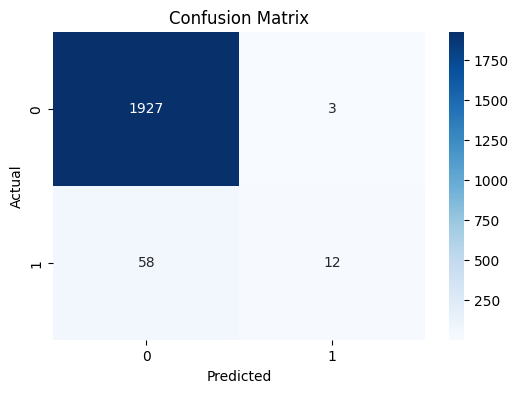

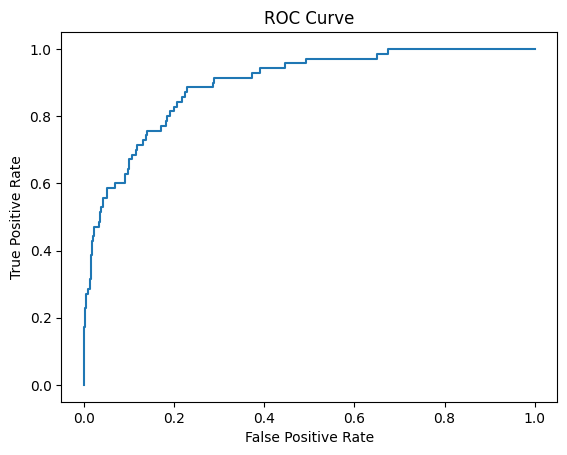

In [360]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print classification report and accuracy
print(classification_report(y_test, y_pred))
Logistic = accuracy_score(y_test, y_pred)
print('Logistic Regression: ', Logistic)

# Confusion Matrix and ROC Curve
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score: ", roc_auc)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Plot ROC curve
plt.figure()
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig("roc_curve.png")


# After CTGAN

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1930
           1       0.38      0.44      0.41        70

    accuracy                           0.95      2000
   macro avg       0.68      0.71      0.69      2000
weighted avg       0.96      0.95      0.96      2000

Logistic Regression:  0.955
ROC-AUC Score:  0.7082161361954108


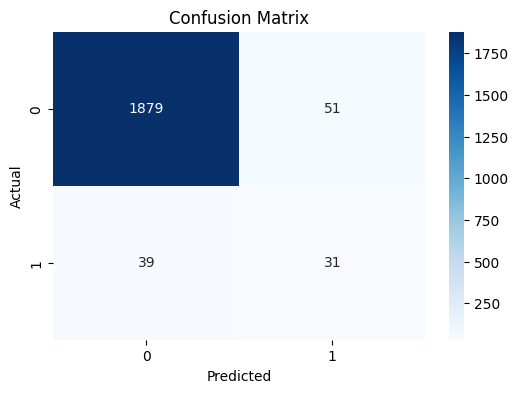

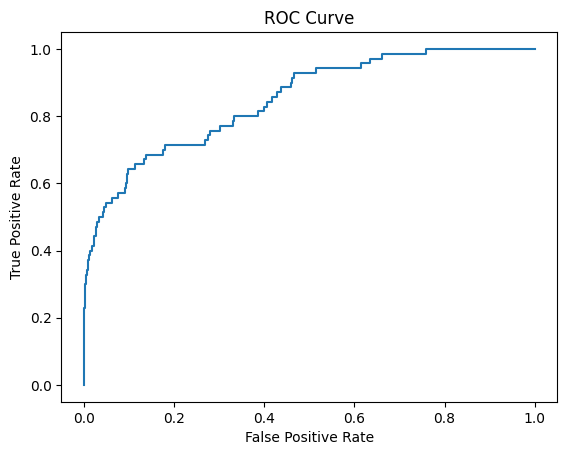

In [361]:
# Logistic Regression
clf = LogisticRegression()
clf.fit(new_xtrain, new_ytrain)
y_pred = clf.predict(X_test)

# Print classification report and accuracy
print(classification_report(y_test, y_pred))
Logistic = accuracy_score(y_test, y_pred)
print('Logistic Regression: ', Logistic)

# Confusion Matrix and ROC Curve
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score: ", roc_auc)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Plot ROC curve
plt.figure()
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig("roc_curve.png")

## Using SMOTE

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1930
           1       0.15      0.83      0.25        70

    accuracy                           0.83      2000
   macro avg       0.57      0.83      0.58      2000
weighted avg       0.96      0.83      0.88      2000

Logistic Regression:  0.8295
ROC-AUC Score:  0.8290525536639527


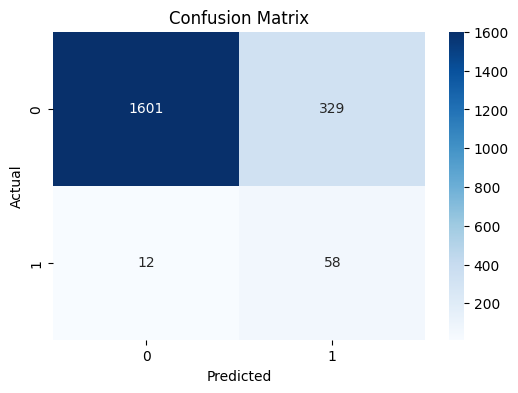

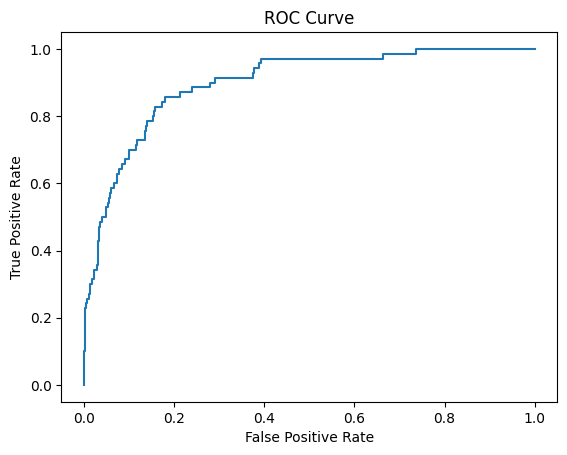

In [362]:
# Logistic Regression
clf = LogisticRegression()
clf.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = clf.predict(X_test)

# Print classification report and accuracy
print(classification_report(y_test, y_pred))
Logistic = accuracy_score(y_test, y_pred)
print('Logistic Regression: ', Logistic)

# Confusion Matrix and ROC Curve
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score: ", roc_auc)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Plot ROC curve
plt.figure()
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig("roc_curve.png")